In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
print(sklearn.__version__)

0.24.1


In [3]:
print(np.__version__)

1.20.1


In [4]:
print(pd.__version__)

1.2.4


In [5]:
'''
This is a dataset that contains a number of different automobile features, which we use to predict how many 
miles that automobile runs per gallon of fuel.
'''
automobile_df=pd.read_csv('data/auto-mpg.csv')


In [6]:
'''
 If you want to view a sample of records in your data frame so that you can explore the dataset, 
 you can call the df.sample function. The parameter 5 indicates that five records should be displayed. 
 And here are five records chosen at random from our dataset.
'''
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
161,16.0,6,250.0,105,3897,18.5,75,1,chevroelt chevelle malibu
96,13.0,8,360.0,175,3821,11.0,73,1,amc ambassador brougham
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
220,33.5,4,85.0,70,1945,16.8,77,3,datsun f-10 hatchback
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)


In [7]:
'''
The columns at the very right make up the features of our machine learning model. 

The regression models that we're going to build will use these columns in order to make predictions 
about the miles per gallon for that car. 

There are features such as the number of cylinders the car has, the displacement of the car from the bottom, 
the horsepower, the weight, the acceleration, model, year, the origin of the car, and the name of the car. 

The first column off to the left, the mpg column, gives us the miles per gallon for that particular car, 
and this is what we'll try and predict using regression. 
'''
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
104,12.0,8,400.0,167,4906,12.5,73,1,ford country
66,17.0,8,304.0,150,3672,11.5,72,1,amc ambassador sst
154,15.0,6,250.0,72,3432,21.0,75,1,mercury monarch
271,23.2,4,156.0,105,2745,16.7,78,1,plymouth sapporo
77,22.0,4,121.0,76,2511,18.0,72,2,volkswagen 411 (sw)


In [8]:
'''

The shape variable for any dataset gives us how many records are in the dataset and how many columns. 
So we have 398 records and 9 columns of data. 


These 9 columns include 8 columns of features and 1 column that forms our machine learning target, 
the value we are trying to predict, the mpg. 
'''
automobile_df.shape

(398, 9)

In [9]:
'''

Now, datasets that we work with in the real world often contain missing fields or values, and these records need to be handled and cleaned in some way. 
This is part of the data wrangling or preprocessing that will apply to our data.


Now this particular dataset contains question marks(?) in place of missing fields; 
we'll replace all of those question marks with NaNs, or not a numbers. 
Call the automobile_df.replace function in order to perform this replacement.
'''

automobile_df=automobile_df.replace("?",np.nan)

In [10]:
'''

And once you have NaNs in place of missing values, it's very easy to clean your data frame. 
The drop any function on your pandas DataFrame will simply drop all of those records which have any fields missing.
'''

automobile_df=automobile_df.dropna()

In [11]:
'''
And if you take a look at the shape of your data frame now, you see that we have 392 records. 
We originally had 398 records, and now it's 392. 
6 records had missing fields, they were dropped.
'''
automobile_df.shape

(392, 9)

In [12]:
'''
While we are building up the features for our linear regression model, 
it's pretty clear that the origin of the car and the name of the car has no impact on its mileage. 
This is something that we can determine just by a cursory look at the columns in our data frame, 
so go ahead and drop the origin and car name columns in place. 

These features, we know by using our common sense and logic, have no predictive powers.
'''
automobile_df.drop(['origin','car name'],axis=1,inplace=True)

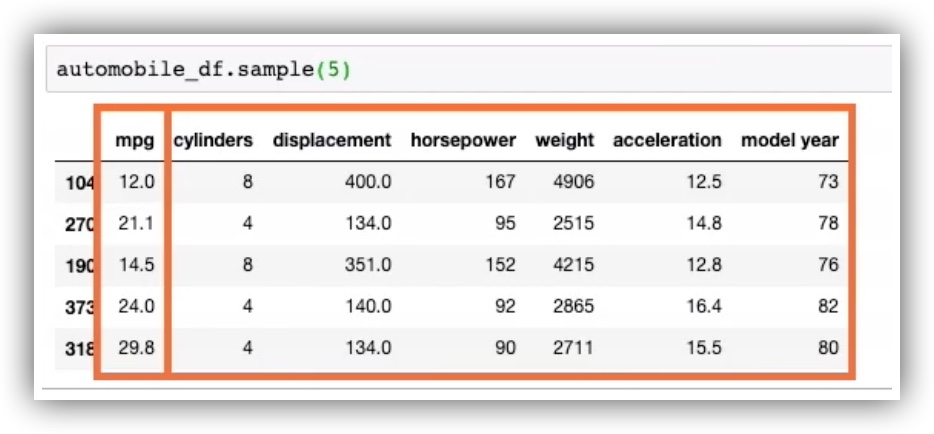

In [13]:
'''

  I'm going to call automobile_df.sample to sample five records from our data frames. 
  And here are the features that we're going to work with: cylinders, displacement, horsepower, weight, 
  acceleration, and model year, and the miles per gallon is our target, what you're going to try and predict.
'''
automobile_df.sample(5)
from IPython.display import Image
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_01-21-45.jpg')

In [14]:
'''

 Now this dataset is from the '90s, and you can see that all of the model years are basically 1973, 78, 82, and so on.
 Now the model year by itself is just an object. Let's make this useful by converting this to be the age of the car.
 
 It's quite possible that we don't know for sure that the age of the car might have some impact on its mileage. 
 Before we get to the age, let's convert the year to its full form, 1973, 1980, and so on, 
 
 so I'm going to prepend the string 19 to the model year. So 19 + model year as string, 
 will give us the resultant model year. 
 
 Assign this new format to the model year column and let's sample our data frame and take a look at the result.
 The model year now has the full year, 1982, 1972, and so on. 
'''
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [15]:
'''

 Assign this new format to the model year column and let's sample our data frame and take a look at the result.
 The model year now has the full year, 1982, 1972, and so on. 
 
 
 Now with this, we can calculate how old this particular car is.
'''
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
33,19.0,6,232.0,100,2634,13.0,1971
223,15.5,8,318.0,145,4140,13.7,1977
341,23.5,6,173.0,110,2725,12.6,1981
282,22.3,4,140.0,88,2890,17.3,1979
94,13.0,8,440.0,215,4735,11.0,1973


In [16]:
'''
 You can choose any reference date to calculate the age, as long as it's later than the last year that the 
 car was made. 
 
 In order to keep things simple, we'll calculate each field by subtracting from the current year.
 
 I'll use the datetime library to access the current year we're at; this year will be in numeric form.
 
 And I'll convert the data in the model year column to numeric form by calling pd.to_numeric.
 
 The result will be a number that will represent the age of a particular car.

'''

automobile_df['age']=datetime.datetime.now().year-pd.to_numeric(automobile_df['model year'])

In [17]:
'''
 Go ahead and drop the original model year field, we no longer needed because we have the age column.
'''
automobile_df.drop(['model year'], axis=1, inplace=True)

In [18]:
'''
 Let's view a sample of this data frame. 
 Once again, you can see we now have each column which tells you how old this particular car is. 
 
 The absolute values for these ages don't really matter so much. 
 It is their relative values that are more significant. 
 If a car is older than another, it's possible that its mileage goes down. 
'''

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
134,16.0,6,258.0,110,3632,18.0,47
26,10.0,8,307.0,200,4376,15.0,51
378,38.0,4,105.0,63,2125,14.7,39
141,29.0,4,98.0,83,2219,16.5,47
246,32.8,4,78.0,52,1985,19.4,43


In [19]:
'''

If you're building and training a machine learning model, all of the inputs to your model need to be numeric.

Take a look at the data types of the different columns. 
You'll find that all of them are numeric except for one, that is the horsepower column. 

The horsepower is a numeric field, but its data type in our data frame is object. 
We need to fix this. This is very easily done using pandas.





'''
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [20]:
'''
Simply call pd.to_numeric to convert horsepower to a numeric field and assign it to the horsepower column once again.

'''
automobile_df['horsepower']=pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [21]:
'''
Let's now call describe on our dataset in order to get a few statistical bits of information about all of our 
numerical features. 

You can see that all of the features in our dataset are now numeric. 

We have mean value, standard deviations, and the different percentiles displayed here. 

The describe function in pandas is an easy way for you to get a quick feel for your numeric data.
'''

automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,45.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,42.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,45.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


Text(0, 0.5, 'Miles per gallon')

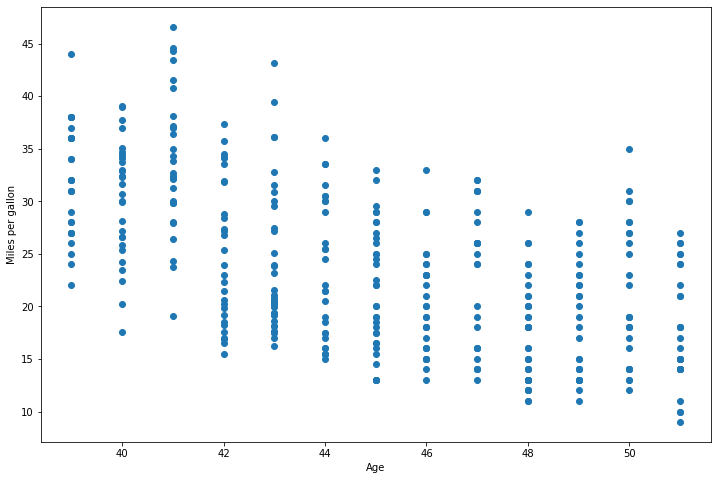

In [26]:
'''
Understanding the features of our dataset and what we're trying to predict is the first step. 
The next step is to explore the data using visualizations. 

I'm going to use Matplotlib to plot a few scatter plots in order to understand the 
pairwise relationships that exists in my data.


 here I'm going to plot age versus the automobile's miles per gallon. 
 We thought it might be possible that the older car is, the lower its mileage. 
 Let's see if that's true using our visualization.
'''

fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['age'],automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per gallon')

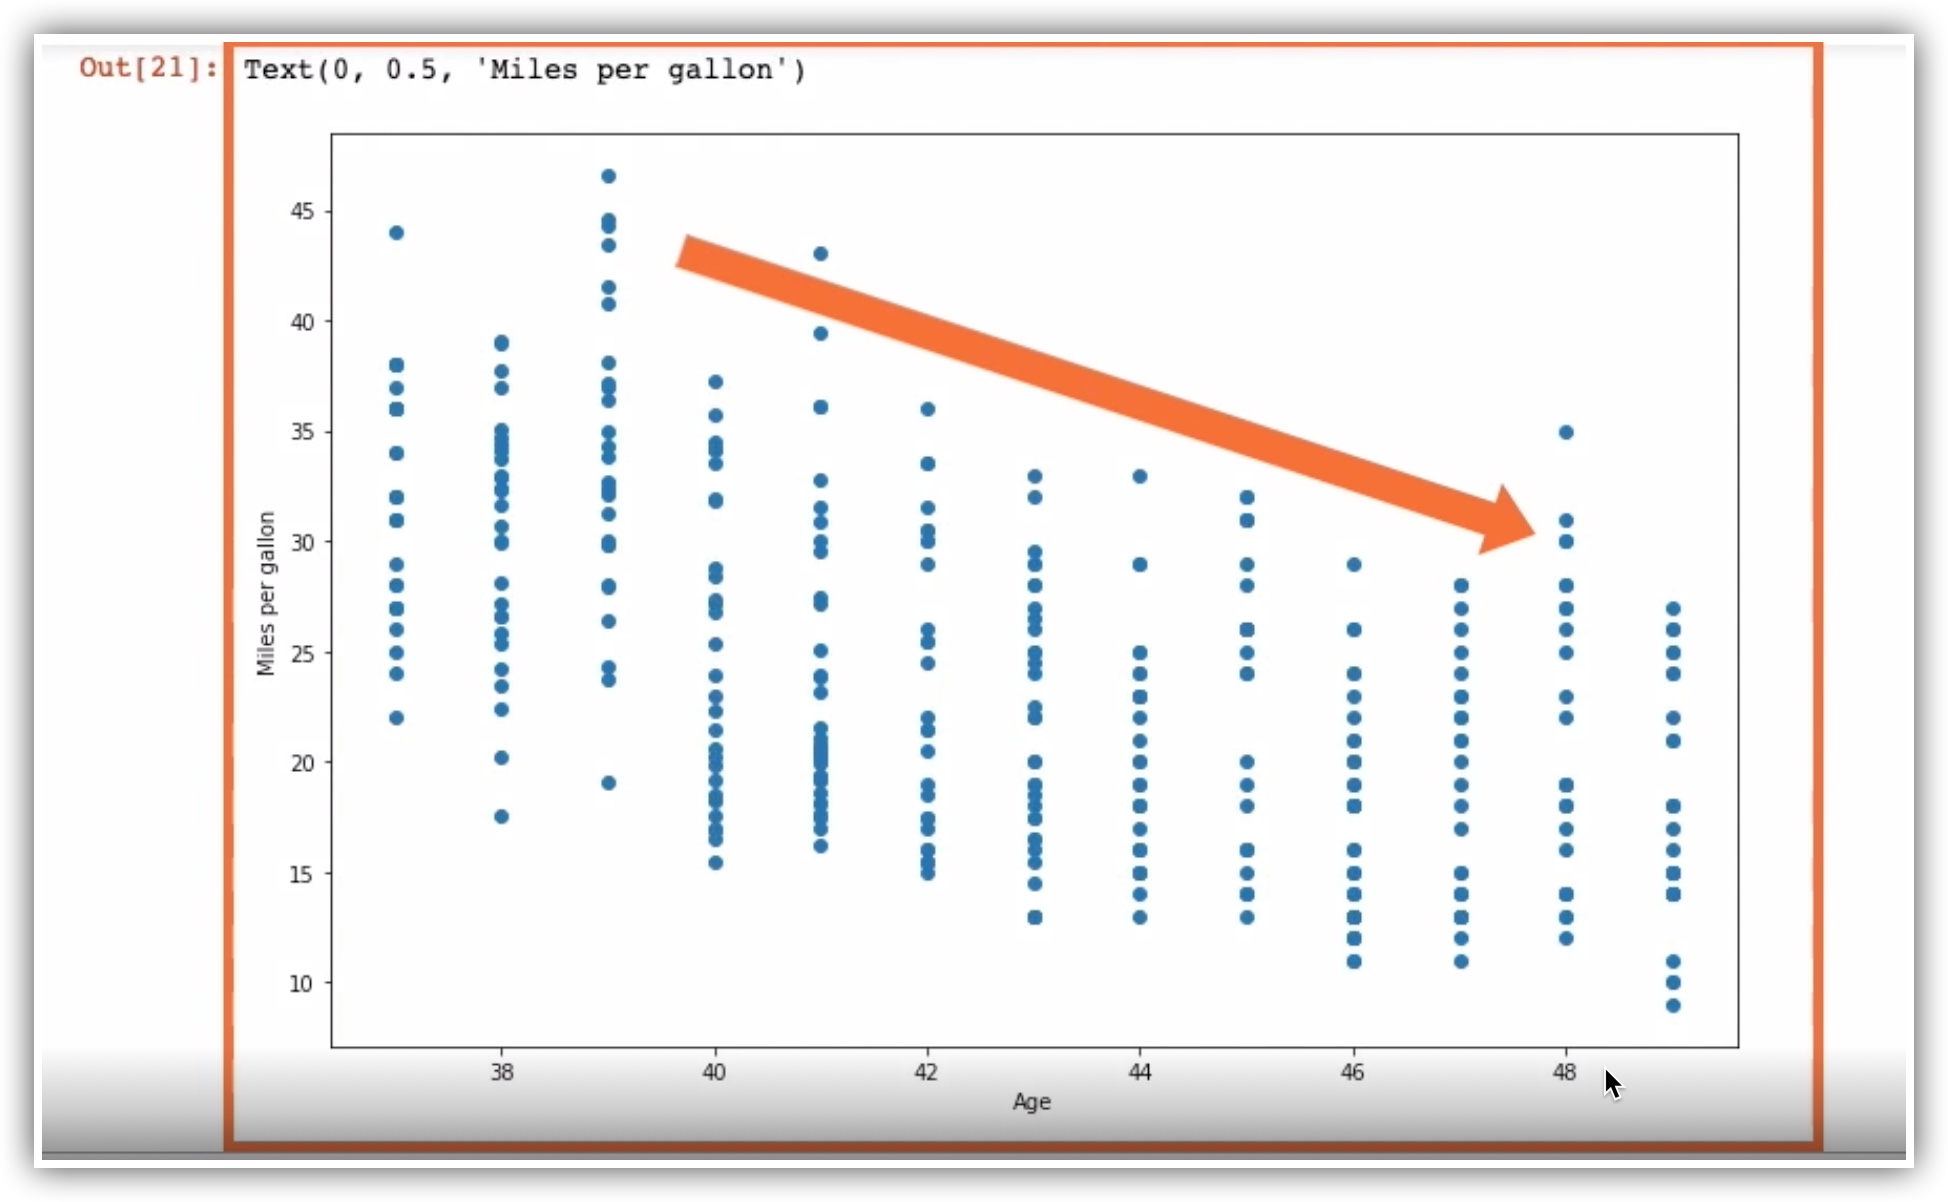

In [28]:
'''
And you can see that there is a definite downward trend here. 
Now this doesn't necessarily mean that a relationship does exist that needs more statistical analysis, 
but this visualization seems to tell us that older cars have lower mileage. 

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-20-04.jpg')

Text(0, 0.5, 'Miles per gallon')

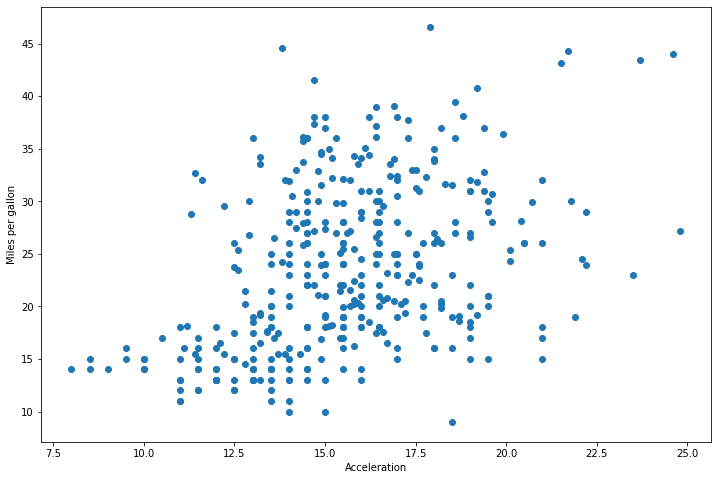

In [29]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['acceleration'],automobile_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

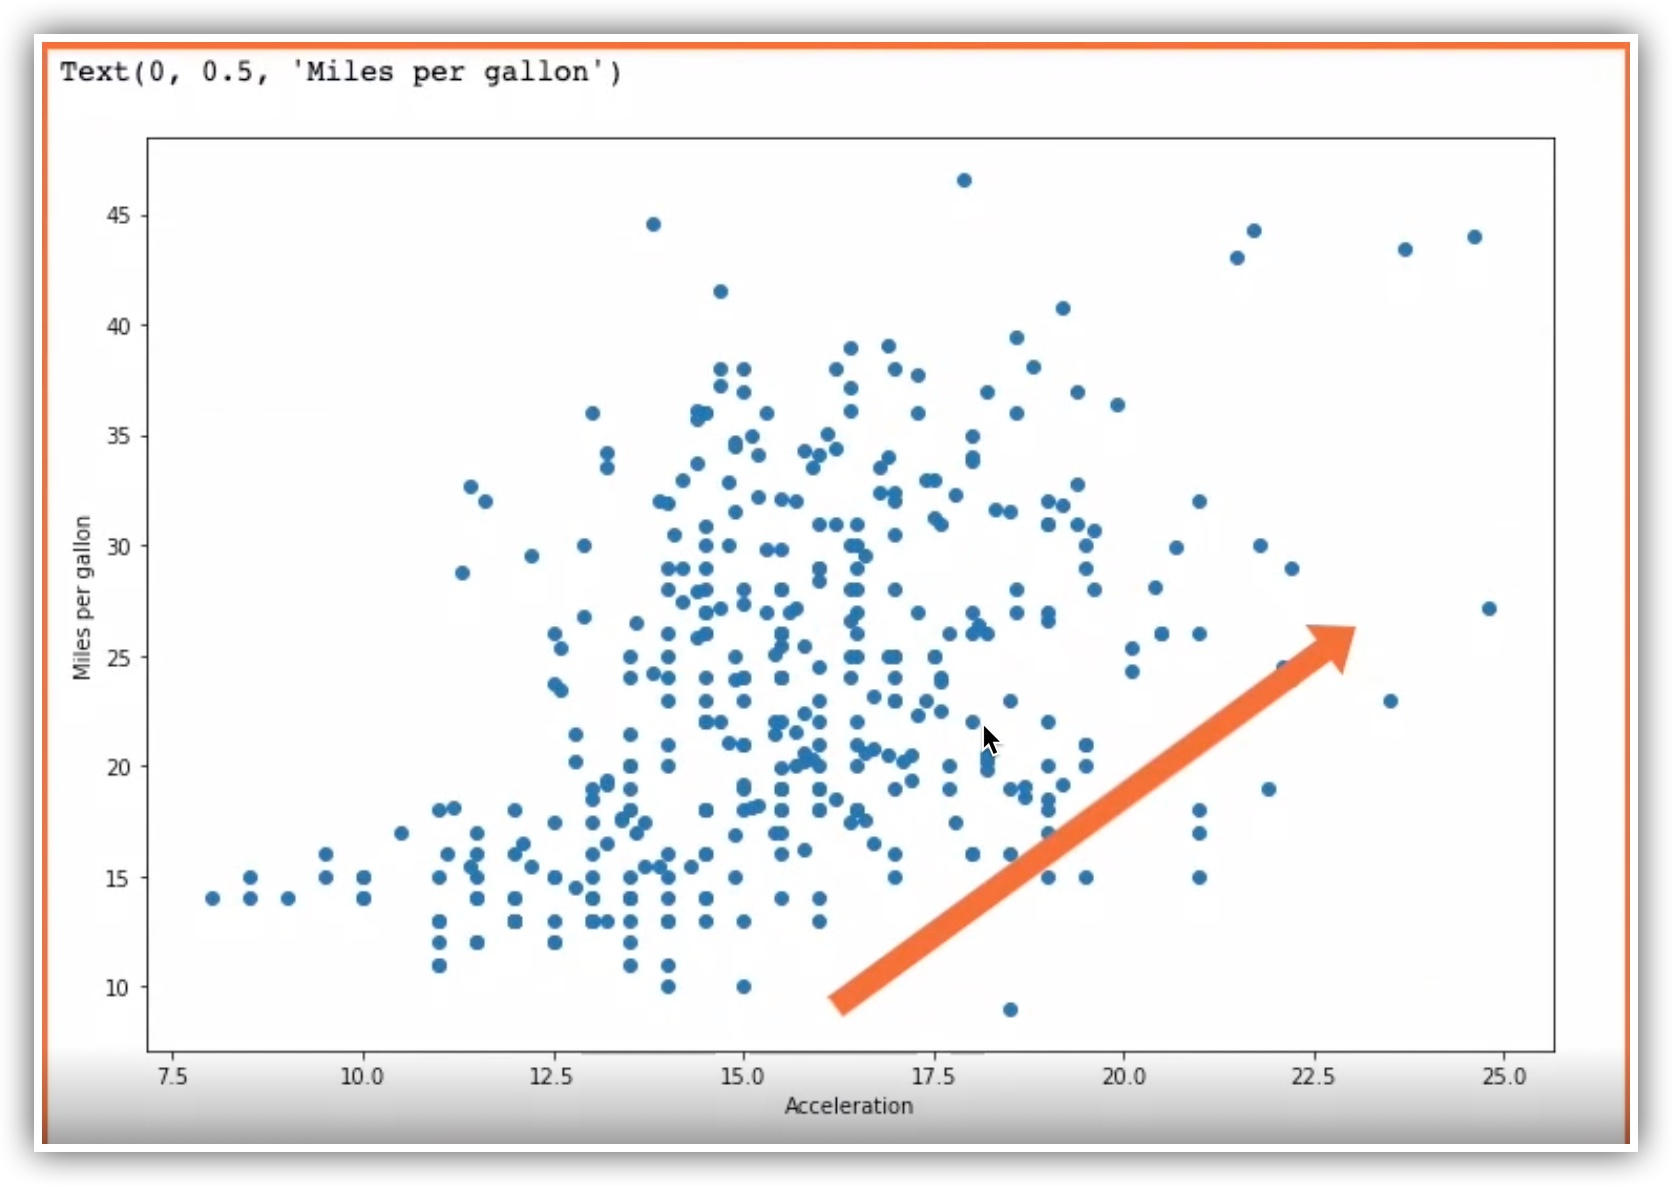

In [32]:
'''

Let's plot another scatter plot here. 
This time we'll try and see whether the acceleration of a particular car has any impact on mileage. 
Here is our resulting scatter plot, and you can see with acceleration on the x axis and miles per gallon 
on the y axis, there's a definite upward slope to the scatter plot. 

So maybe there is a relationship here.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-28-30.jpg')

Text(0, 0.5, 'Miles per gallon')

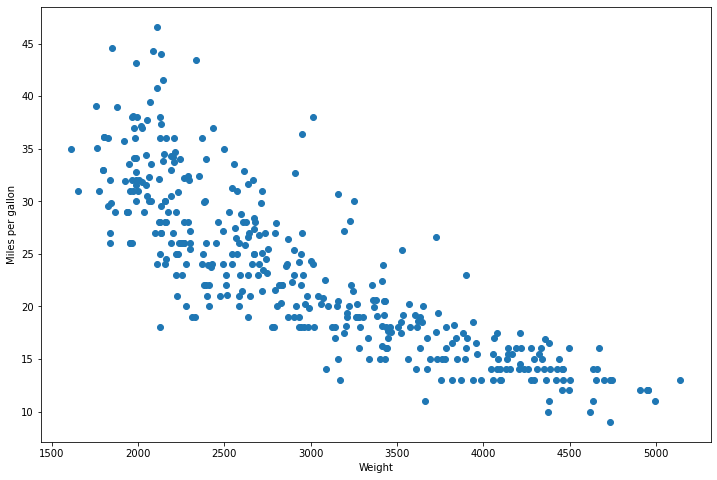

In [33]:
'''
I'm curious about another one of our input features, that is the weight of the car. 
Does the weight of the automobile have any significant impact on its mileage? 
Maybe this scatter plot will give us some information. 
And yes, definitely there is a downward trend here. 
It seems like greater the weight of the car, lower its mileage, which makes sense to us intuitively. 
'''
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['weight'],automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

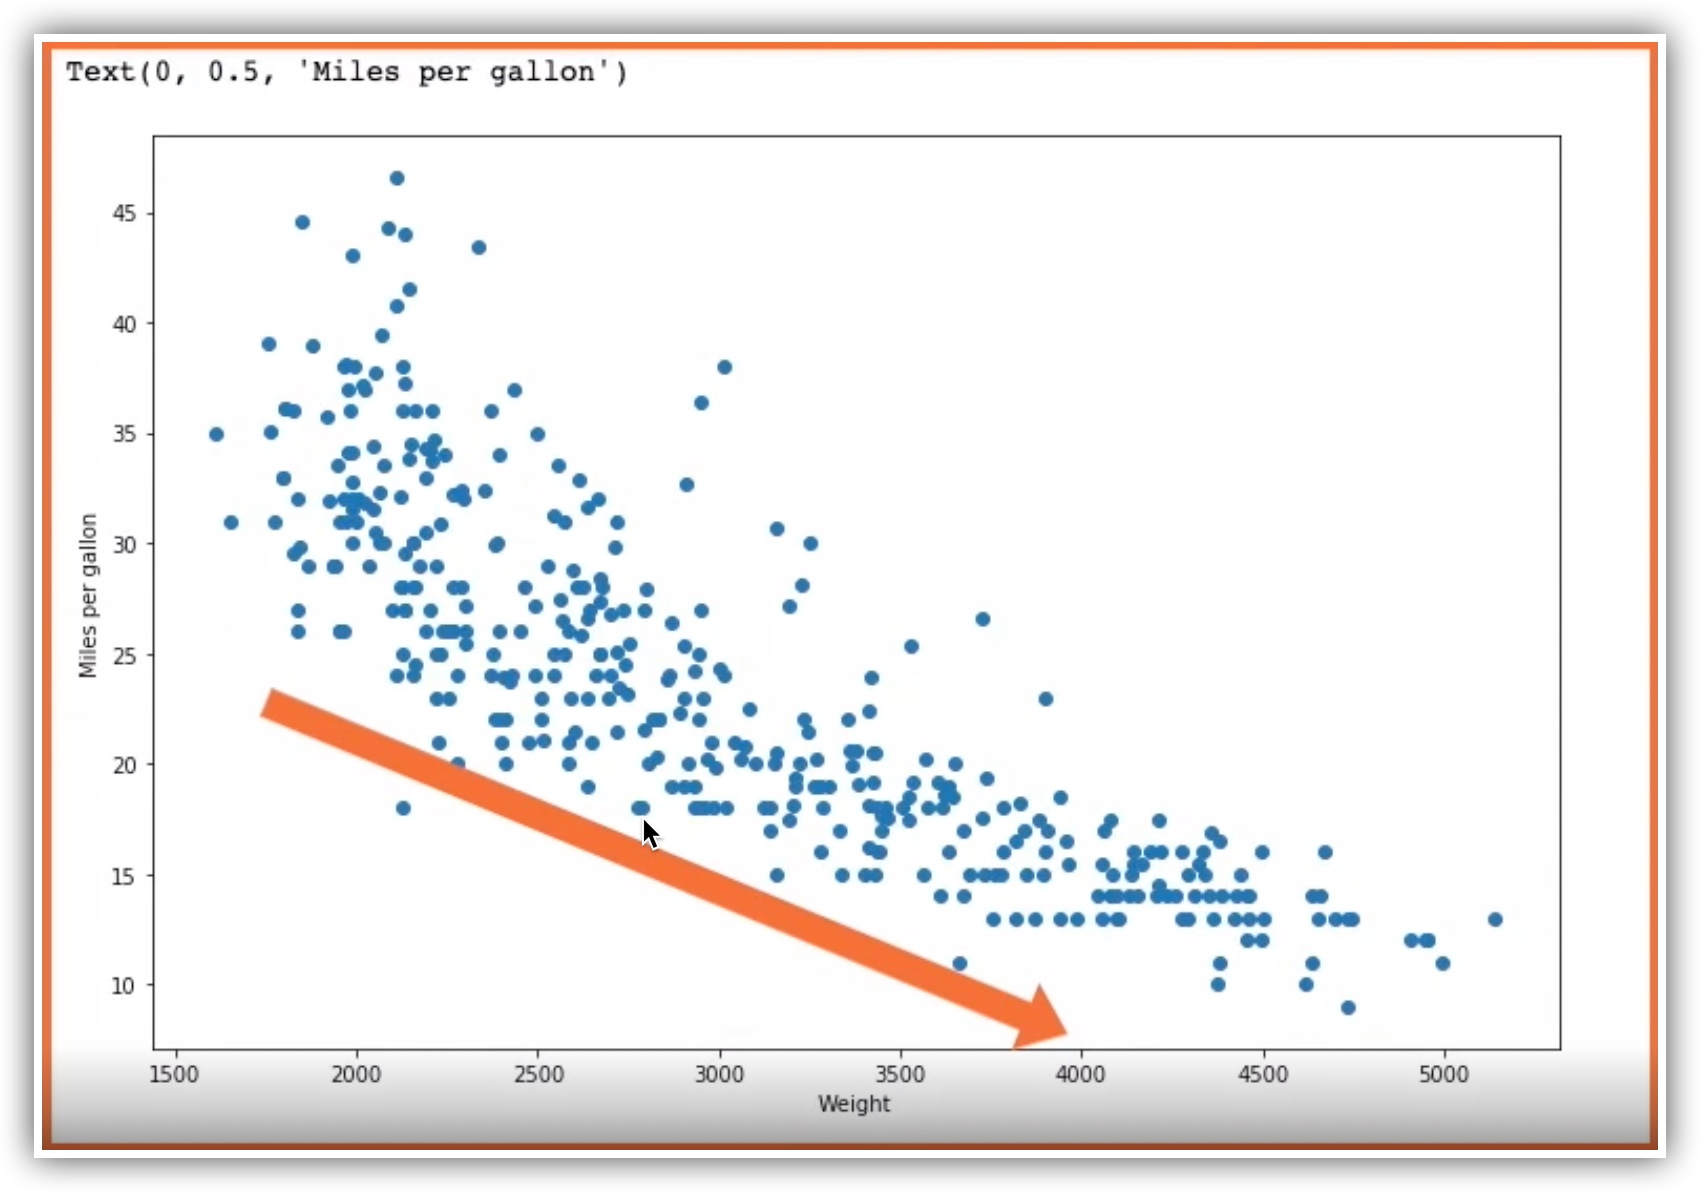

In [34]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-31-31.jpg')

Text(0, 0.5, 'Miles per gallon')

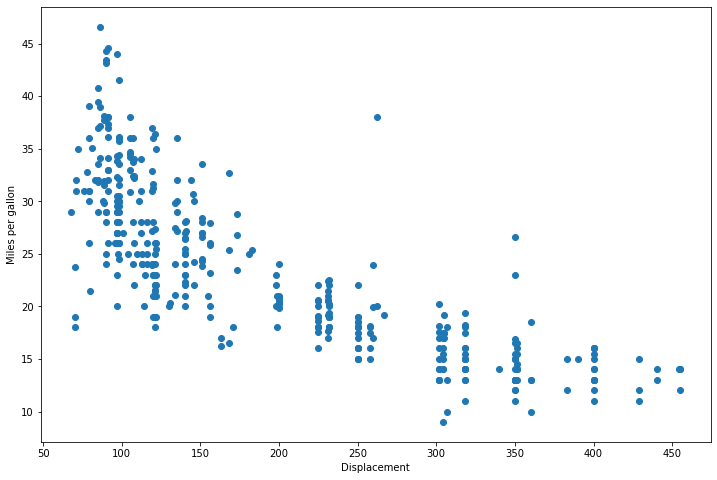

In [35]:
'''

What about how the car is positioned relative to the ground, the displacement of the car versus mileage, 
is there any relationship? 

And once again, the visualization seems to say yes. 
It seems like greater the displacement of the car off the ground, lower the miles per gallon it travels. 
'''
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['displacement'],automobile_df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')

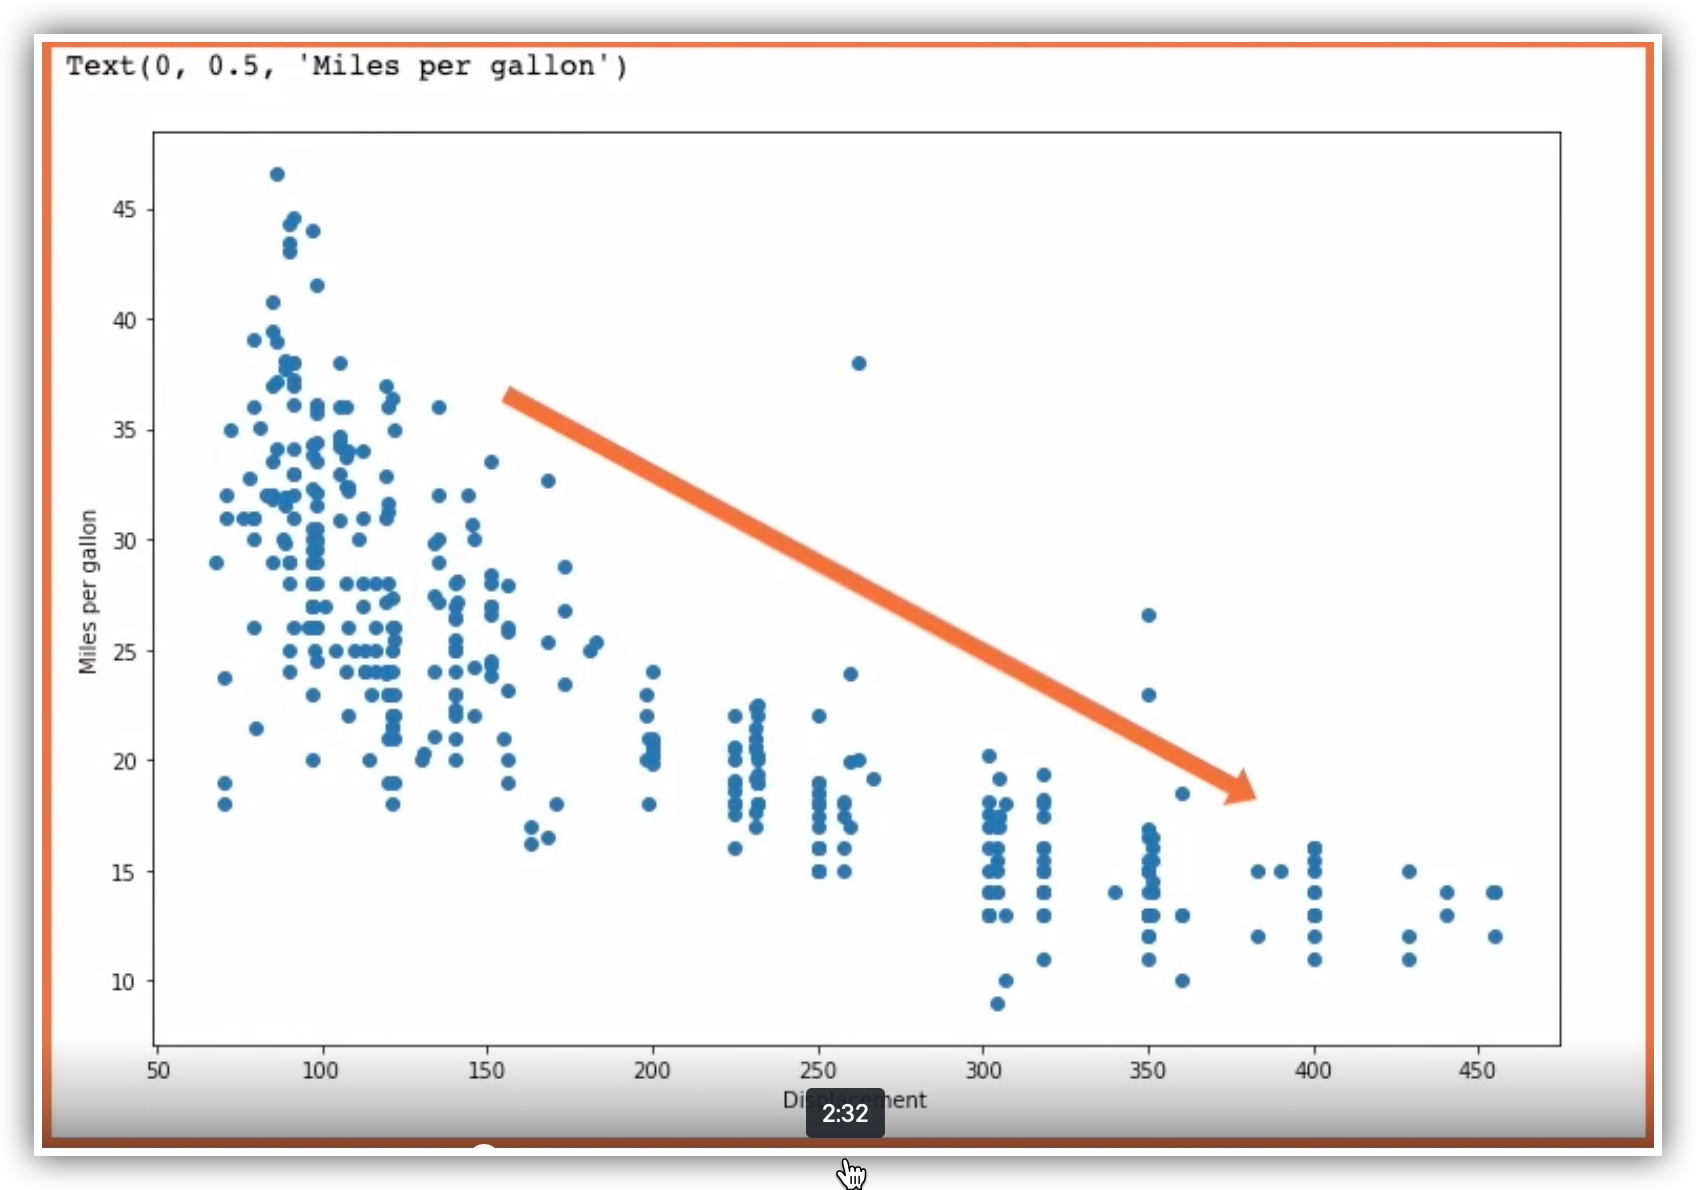

In [36]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-33-37.jpg')

Text(0, 0.5, 'Miles per gallon')

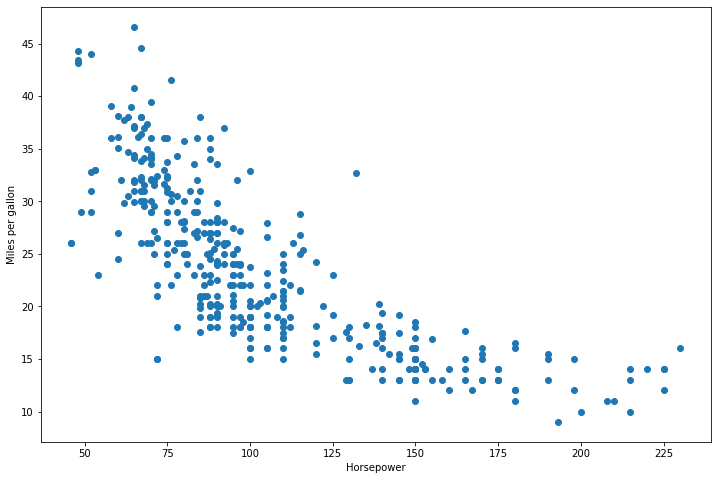

In [37]:
'''

This pairwise exploration of variables really helps us cement our understanding of the underlying dataset. 
What about horsepower, does it affect the miles per gallon? 
Yes, indeed, it does.
'''
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['horsepower'],automobile_df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

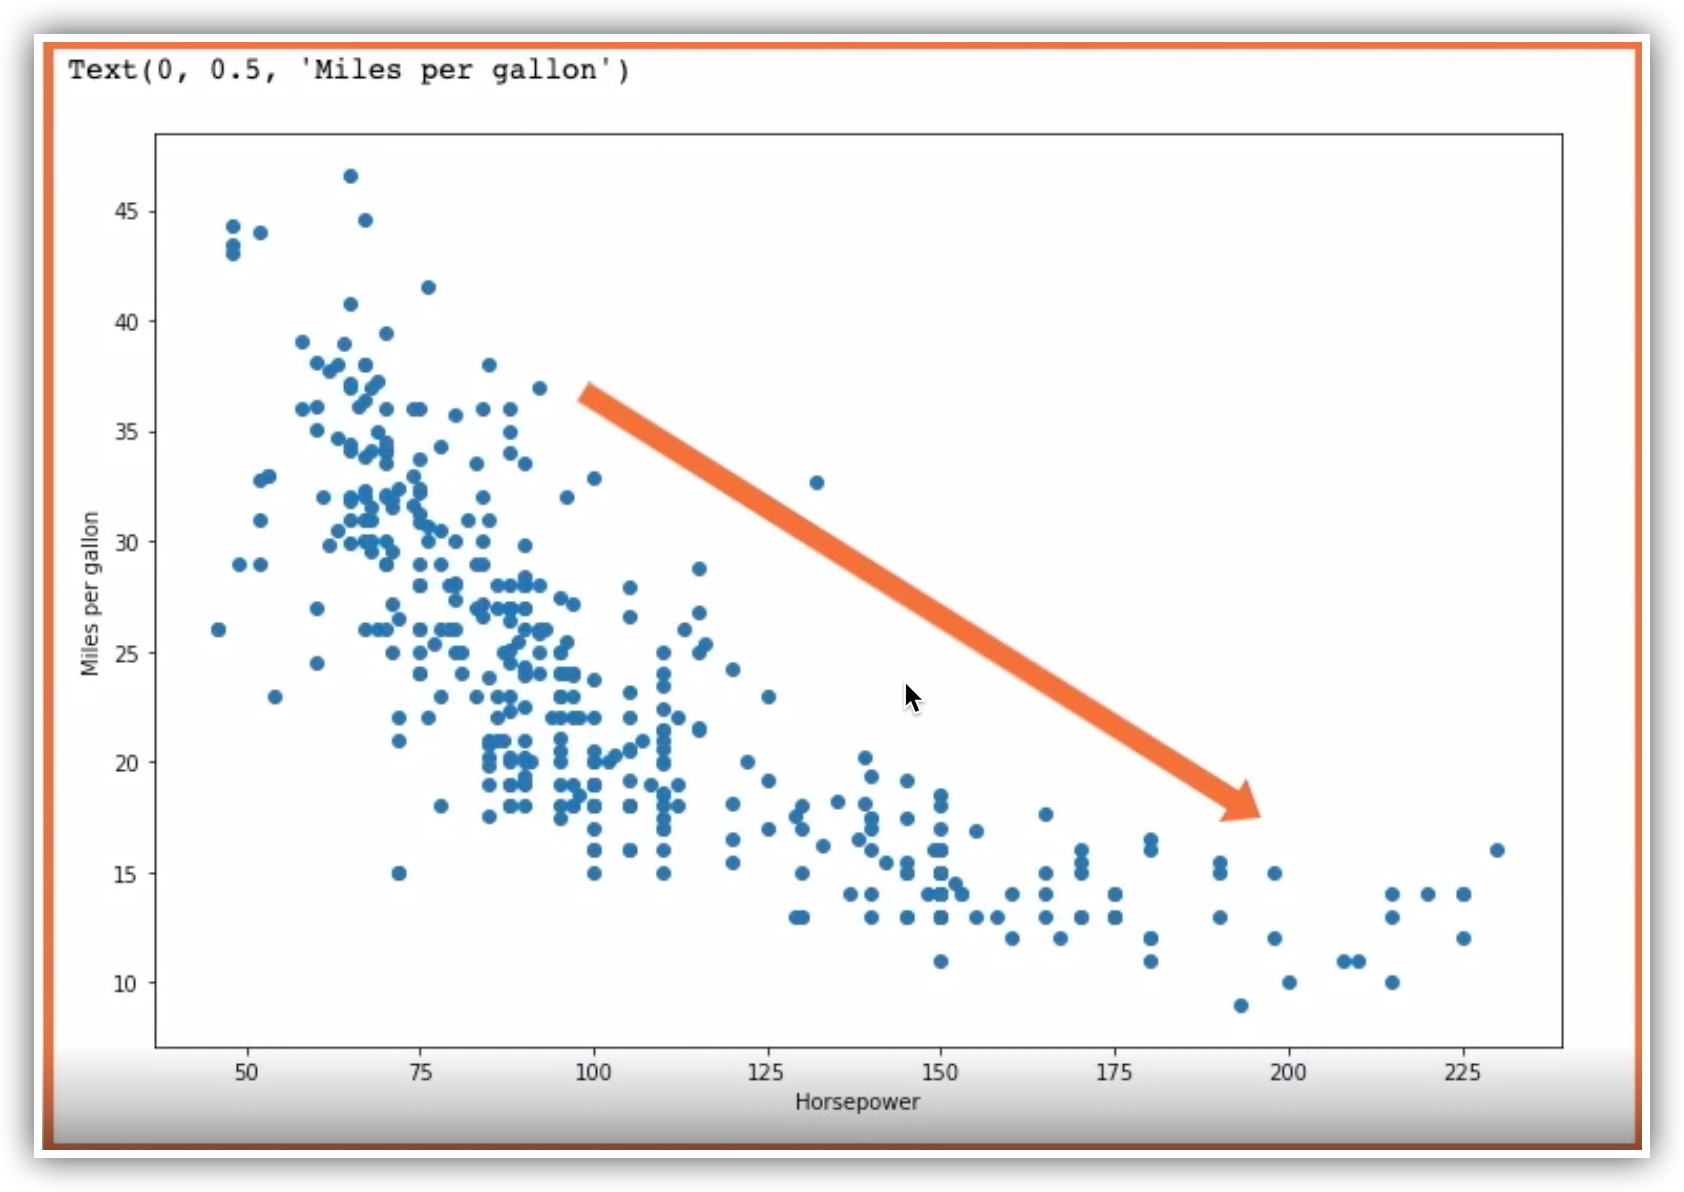

In [39]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-35-22.jpg')

Text(0, 0.5, 'Miles per gallon')

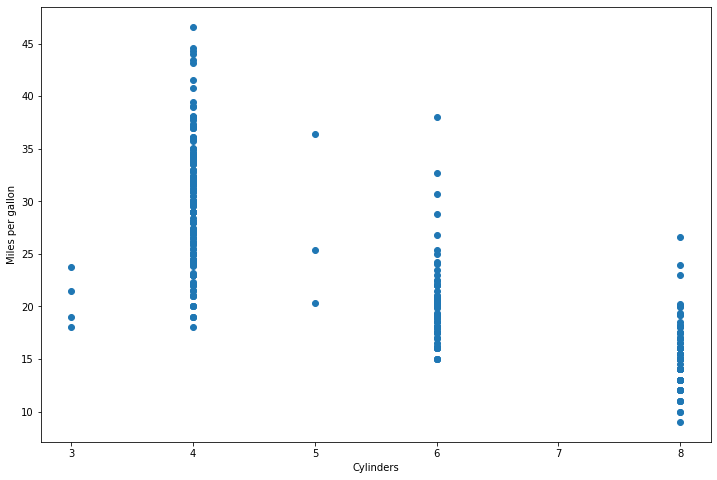

In [41]:
'''
Let's consider one last visualization here, cylinders versus mpg. 

And this scatter plot definitely seems to be a little harder to pass as compared with others. 
Cars with four cylinders overall seem to have the best miles per gallon.

When you train your machine learning model, you feed it features that you think are significant.
'''
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [43]:
'''
 Now it's quite possible that your features themselves have interrelationships or correlations with one another. 
 
 Correlations is a statistical measure that tells you whether and how strongly pairs of variables are related. 
 
 Data frames offer this nifty little core function that will list out pairwise correlations between every pair 
 of variables in your dataset. 
 
 Correlation values are floating point numbers between -1 and 1.
 
 1 implies a perfect positive correlation between two variables. 
 
 You can see here that every variable is perfectly positively correlated with itself. 
 
 Positive correlation implies that two variables move together in the same direction. 
 A negative correlation implies that the two variables move in different directions. 
 
 The raw correlation numbers tell us that acceleration is positively correlated with the mileage per gallon. 
 You can also see that weight is negatively correlated with miles per gallon. 
 
 In fact, weight is highly negatively correlated, - 0.83.
'''
automobile_corr=automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot:>

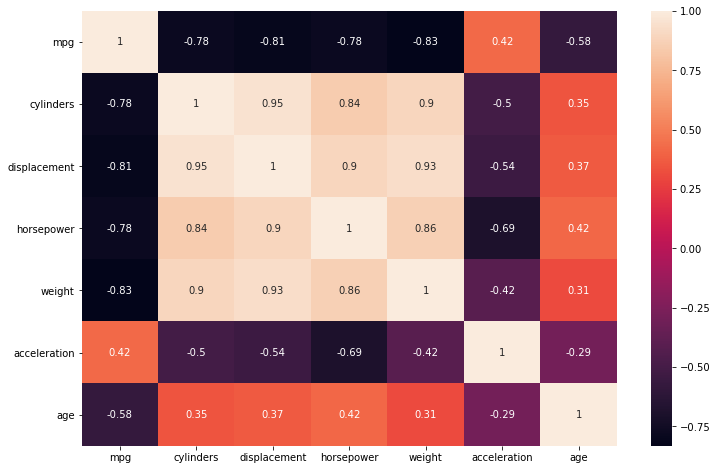

In [44]:
'''
 Viewing correlations with the raw numbers is hard, which is why we use a visualization technique 
 called the heatmap in order to view correlations in our data. 
 
 When we pass in annot is equal to True to the heatmap in Seaborn, it will print out the actual 
 correlation number along with the color-coded grid. 
 
 And this is what a heatmap looks like. Lighter colors tending towards cream denote positive correlation, 
 darker colors tending towards black denote negative correlation. 
 
 This value of - 0.58 is in the mpg row and the age column. 
 This shows that the miles per gallon seems very negatively correlated with the age of the car. 
'''
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(automobile_corr,annot=True)

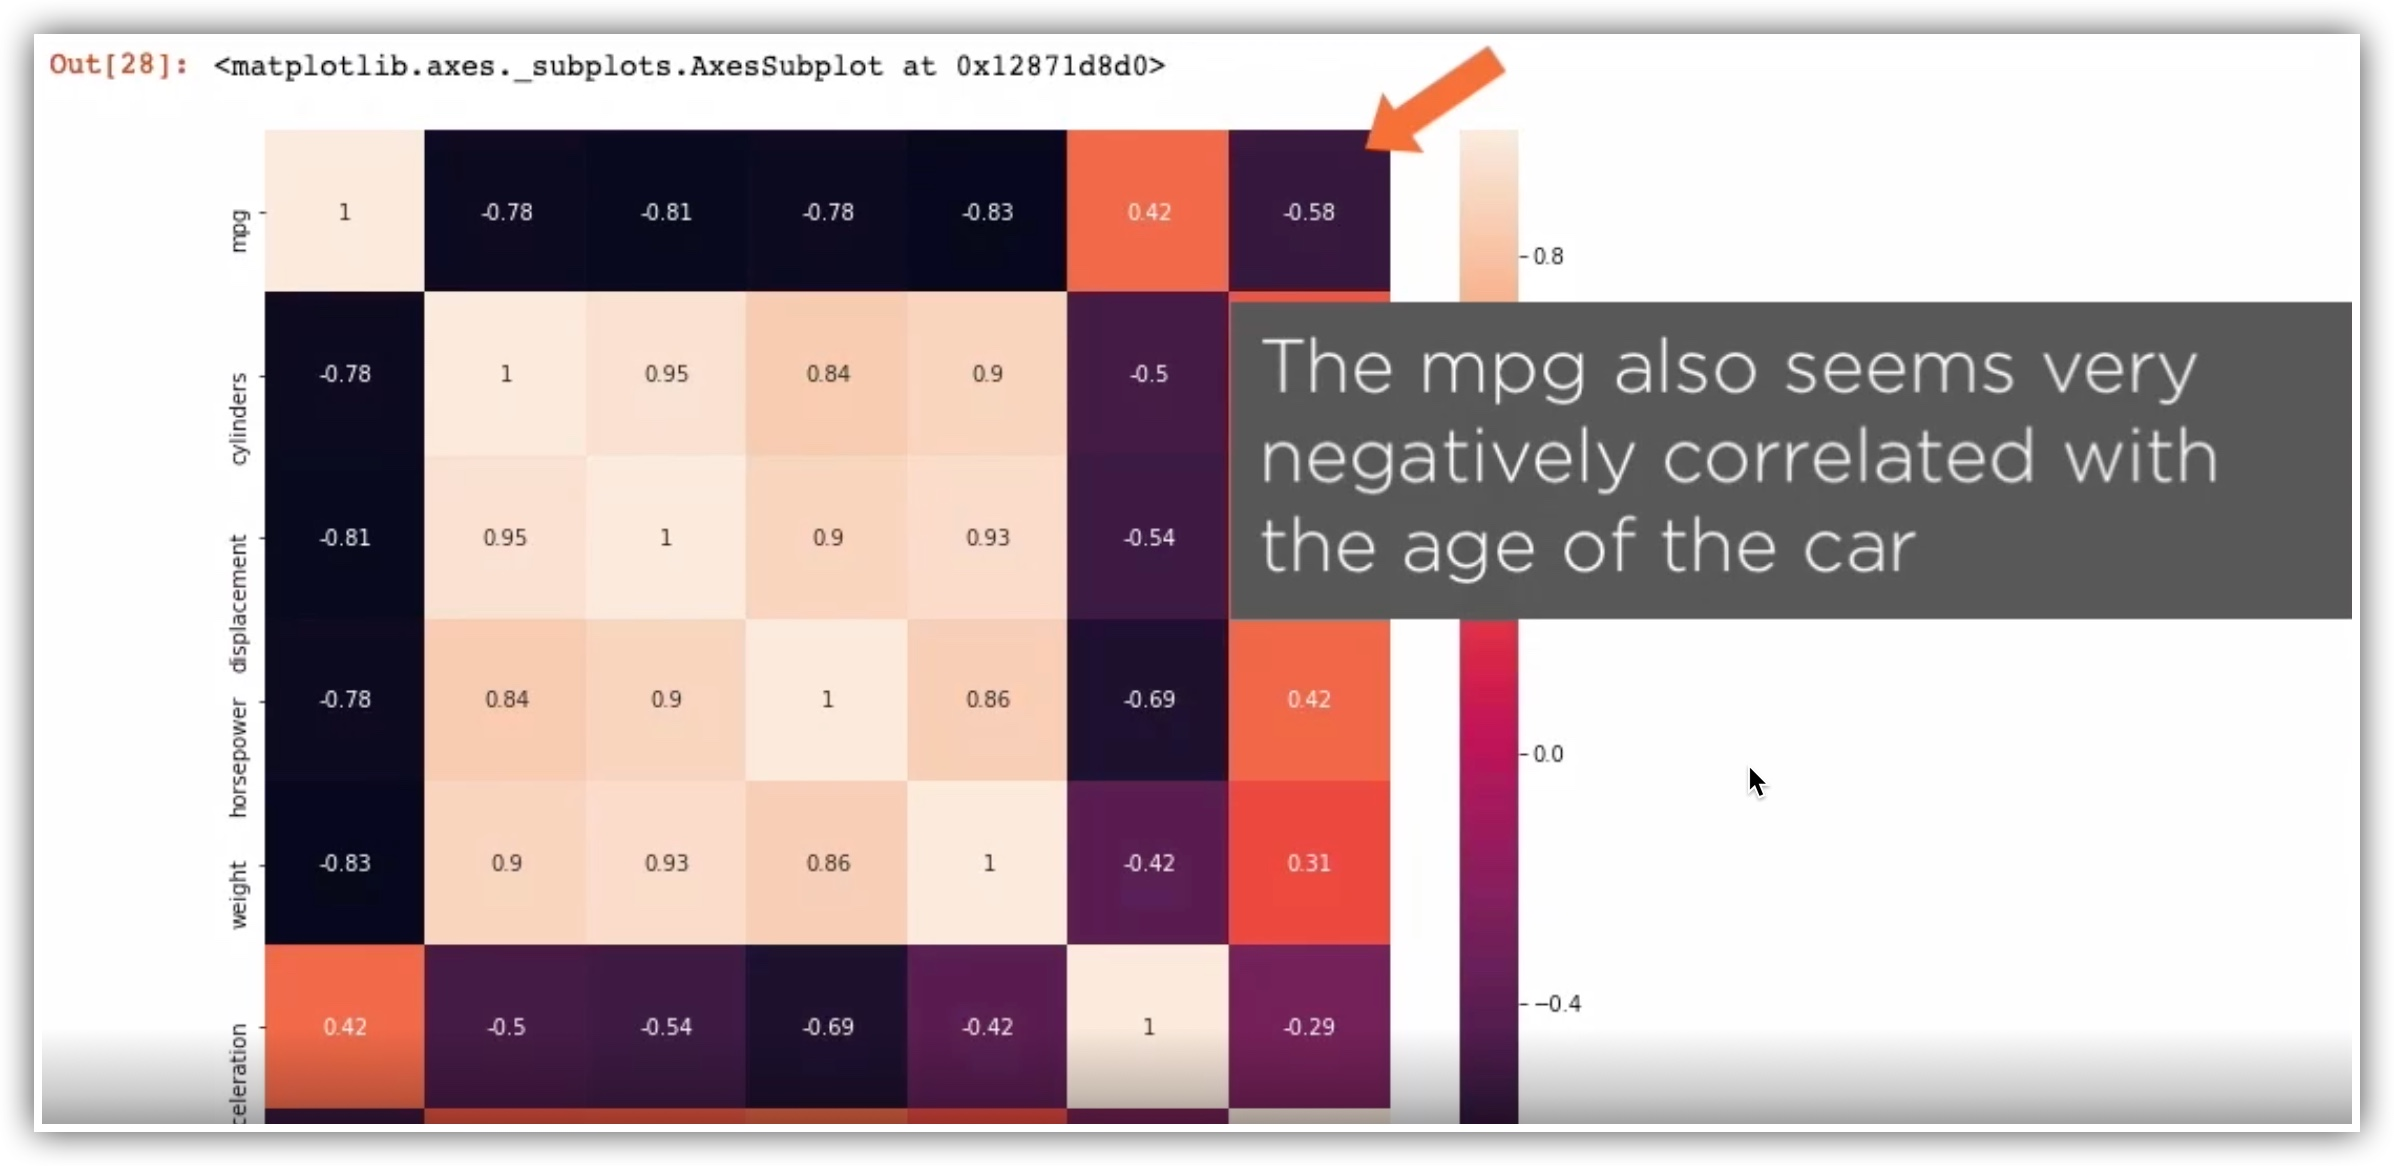

In [45]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-49-07.jpg')

In [46]:
'''

 We've done a bunch of preprocessing on our dataset, we've also viewed the relationships in our data. 
 
 Now let's take this updated data frame and shuffle it so that we feed and shuffle data to our 
 machine learning models. 
 
 I'll use the sample function on our data frame to shuffle my dataset, 
 I'm keeping all of the original samples, frac is equal to 1, and I'm resetting the indices. 
 
 Drop is equal to True, passed into reset_index will drop the original index values that existed in our data frame. 
 
 Here is our shuffled and cleaned up data frame. 
 
 Now, shuffling data before feeding into an ML model is important so that our model doesn't 
 inadvertently pick up patterns that do not exist. 
 

 so it's important that your data be shuffled. 
 
 model.
'''

automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.1,6,258.0,120,3410,15.1,43
1,19.2,8,267.0,125,3605,15.0,42
2,15.0,8,350.0,165,3693,11.5,51
3,26.0,4,96.0,69,2189,18.0,49
4,18.5,6,250.0,110,3645,16.2,45


In [48]:
'''
I'm going to save my shuffled and cleaned up dataset to a new CSV file, auto-mpg- processed.csv. 
This is the CSV file that I'll use to build my regression models. 
'''
automobile_df.to_csv('data/auto-mpg-processed.csv', index=False)

In [49]:
'''
Here is what the dataset looks like. The features are cylinders, displacement, horsepower, weight, 
acceleration, and age, and we'll use these features in a linear regression model in order 
to predict the mileage of the car.
'''
automobile_df=pd.read_csv('data/auto-mpg-processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
358,31.0,4,79.0,67,1950,19.0,47
146,36.0,4,105.0,74,1980,15.3,39
96,26.0,4,98.0,90,2265,15.5,48
11,27.9,4,156.0,105,2800,14.4,41
318,25.0,4,97.5,80,2126,17.0,49


In [50]:
'''
When you are building and training a machine learning model, 
how do you know that the model that you've built is a good one? 

Well, you'll evaluate your model on test data. 
Test data are basically a holdout from your training dataset. 
These are instances your model hasn't seen before, and you'll see how well your model predicts 
using those instances. 

Scikit-learn offers a useful train_test_split function in order to split your data into training and test sets.
'''

from sklearn.model_selection import train_test_split


In [67]:
'''
 Let's first perform a linear regression using just one feature; 
 that is, we'll see how the horsepower of a particular car can be used to predict its mileage. 
 
 So your X variable is going to be just horsepower, and the Y variable is going to be MPG. 
 
 The Y variables are what we'll try and predict using our machine learning model.
'''
X=automobile_df[['horsepower']]
Y=automobile_df['mpg']

In [68]:
'''
Let's split our data into training and test sets. 

It's pretty common to use 20% of your data as test data used to measure and evaluate the model that you build 
using your training data, which is 80% of your dataset. 

We've already shuffled our dataset earlier; 
however, you should know that the train test split function in scikit-learn automatically shuffles 
your data as well.
'''
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
'''
Let's take a look at a sample from our training dataset. 
We've used just one feature here, we have just one column for horsepower.
'''
x_train.sample(5)

,horsepower
219,165
11,105
273,85
256,150
217,95


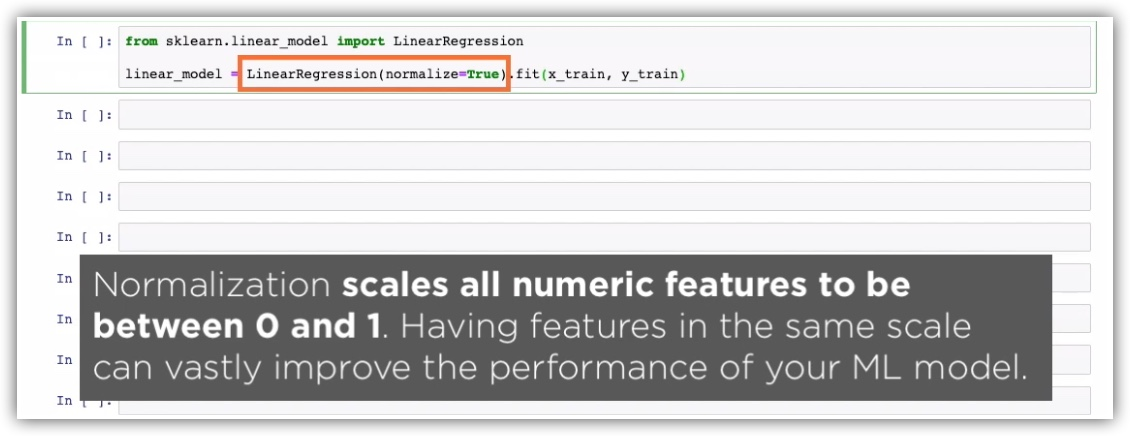

In [70]:
'''
Scikit-learn offers us high-level estimator objects that we can use to build and train our machine learning model.

In order to perform linear regression, we'll use the LinearRegression estimator object.

Import this object and let's instantiate a linear model. 
'''

from sklearn.linear_model import LinearRegression
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-13-03.jpg')



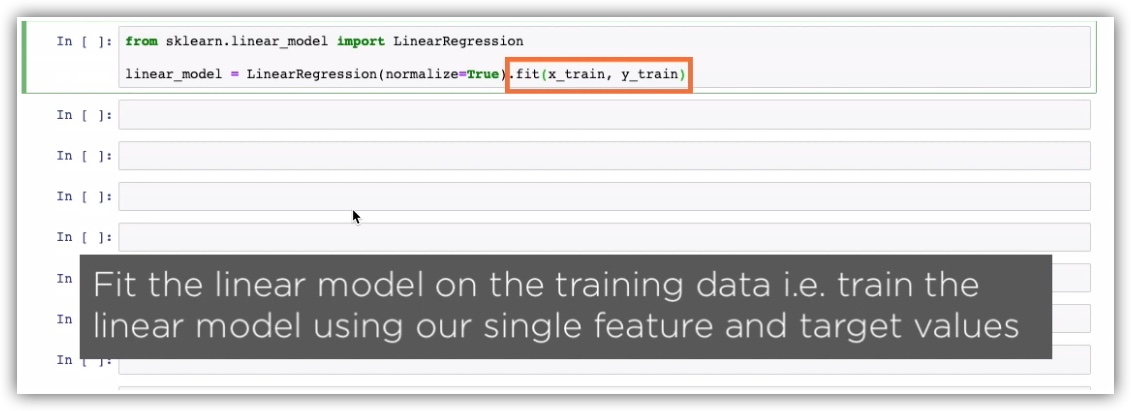

In [71]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-16-23.jpg')

In [72]:
'''
The features that you feed into your machine learning model are numeric and typically when you're working with 
numbers, your ML model performs far better if you normalize your data. 

If you pass in the parameter normalize is equal to True to your LinearRegression estimator object, 
this will scale all your numeric features to be between 0 and 1.

For a simple model, such as the ones that we'll build in this particular course, 
you'll find that normalizing your dataset may or may not make a difference, 
but for more complex models in the real world, normalizing your numeric data is a standard preprocessing 
technique for machine learning.

The fit function on an estimator object is what you call to train your machine learning model. 

This fits the linear model on the training data, so it trains the linear model using our single feature, 
the horsepower, and it uses the target values to adjust the model parameters. 


'''
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

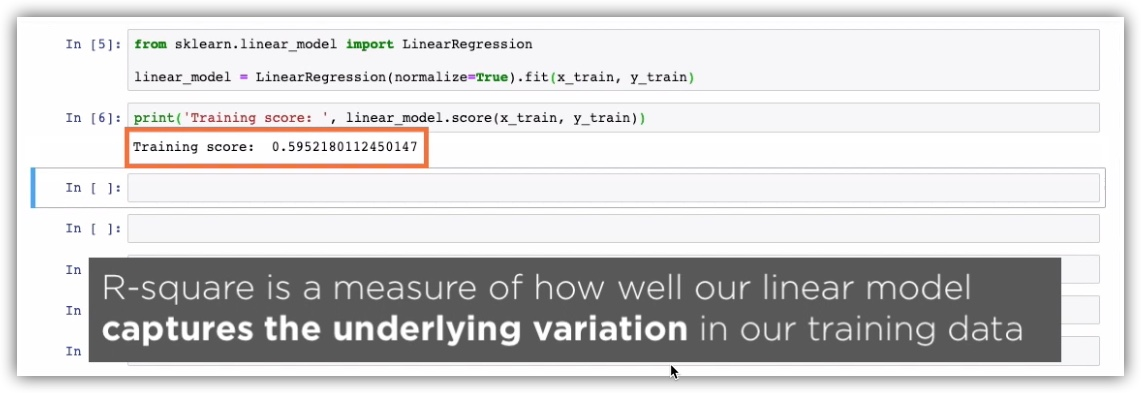

In [75]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-22-19.jpg')

In [73]:
'''
A way to measure how well your model has performed on the training data is to score your model using the 
R squared score. 

The score function on your linear regression model will return the R square value for your training data.

As we discussed, this R square value is a measure of how well our linear model captures the underlying 
variation in our training data. 

And you can see here that with just a single feature, horsepower, our model has an R square of 60%. 
It isn't great, but it isn't terrible either.

'''
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6024580097875996


In [81]:
'''
Now that we have a fully trained model built using a single feature, let's use this model for prediction.

Call linear_model.predict and pass in our test data, as in only X values are the features to predict. 
And here are our predictions, saved in y_pred.
'''
y_pred=linear_model.predict(x_test)


In [79]:
'''
A way to objectively measure how well your linear model performed on instances it 
hasn't seen before is to calculate the R square score on your test data. 

The sklearn.metrics namespace offers a number of useful metrics to use with your ML models. 

Import the r2_score function here from the sklearn.metrics namespace, and use that to score how your 
model performed on the test data. 

Pass in the predicted values from your model, and compare them with the actual values in your test data.
'''

from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6068567162699813


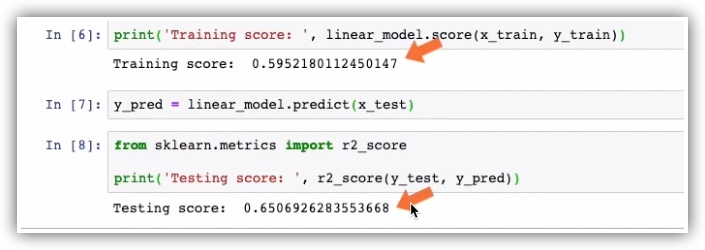

In [80]:
'''
And with just one feature, our linear regression model has an R squared score of 60%. 

Compare that with the R square score of the training data. 
The R square on test data is better than on training data, which means that our model is a good, robust model, 
not overfitted on the training data. 

An overfitted model is one that does well on the training data, but does poorly when used for prediction or on 
test data.

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-29-24.jpg')

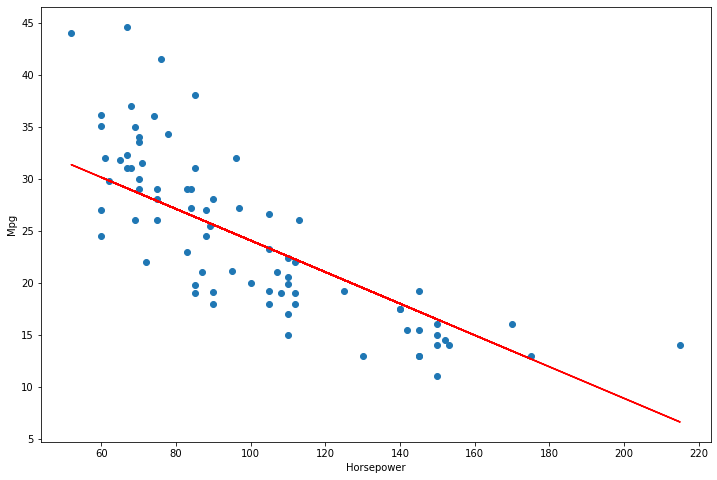

In [82]:
'''
Let's use a little visualization to see how well our linear model fits on the underlying data. 

I'll first plot a scatterplot of horsepower versus miles per gallon. 
This scatterplot represents the test dataset and the actual Y values. 

I'll then plot a line representing the horsepower and predictions from our linear model in the red color. 

And here is what the resulting visualization looks like. 

The scatterplot represents the test data, the red line represents the predicted values from our model. 
This is our linear model.
'''

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [83]:
'''
Let's build one more linear model. 
The feature that we'll use this time to train our model is the age of the car. 

The features from our X variables and our Y values are the target, what we want to predict, miles per gallon. 

Split our dataset into training and test data, initialize a LinearRegression estimator object, 
make sure you normalize your numeric features, and call fit on the training data. 

Once we have a fully trained linear regression model, print out the R square score for this model on the 
training data, use this model for prediction on the test data, and print out the R square score on the 
test data as well. 

And here is how the two scores compare when we use age as our feature. 
The training R square score is 36%, and the test score is 19%, so this is a pretty poor model.
'''
X=automobile_df[['age']]
Y=automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3092327974382676
Testing score:  0.428440845395879


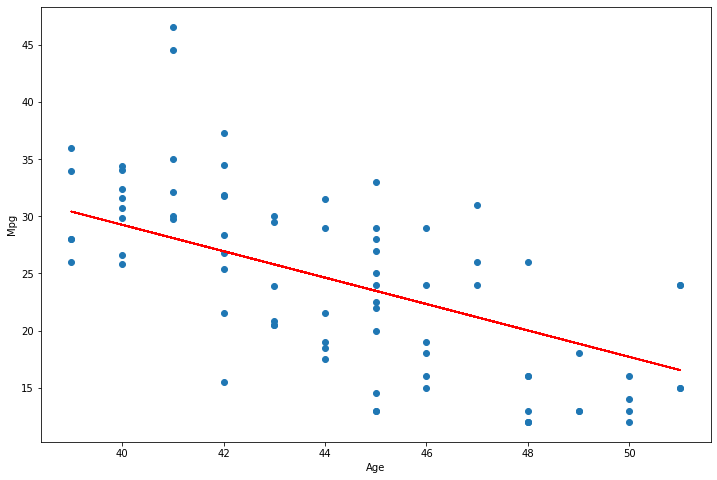

In [84]:
'''
So, age by itself is not really a good predictor for the car's mileage, and this will be born out using our 
visualization as well. 

Plot a scatter plot of X versus actual Y and X versus Y predicted, and here is what the result looks like. 
You can see that the line that we've drawn here really doesn't capture the underlying variation in the data well, 
which is why this model has a low R square score. 

The points are too scattered, too far apart, the line really doesn't represent them well.

'''

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()